In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Подключение к PostgreSQL
conn = psycopg2.connect(
    host='db',  # имя сервиса в docker-compose
    database='weather',
    user='postgres',
    password='postgres'
)

# Загружаем данные
df = pd.read_sql('SELECT * FROM weather_events ORDER BY timestamp DESC LIMIT 100', conn)
df.head()

/tmp/ipykernel_103/2840997821.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT * FROM weather_events ORDER BY timestamp DESC LIMIT 100', conn)


,id,timestamp,temperature_c,humidity_percent,pressure_hpa,wind_speed_ms
0,2265,2025-12-02 10:51:41.470637,1.56,36.92,1017.53,11.12
1,2264,2025-12-02 10:51:39.542117,6.64,79.01,1003.06,10.99
2,2263,2025-12-02 10:51:38.533963,0.86,90.99,1000.79,17.19
3,2262,2025-12-02 10:51:37.531091,16.37,63.93,988.86,0.02
4,2261,2025-12-02 10:51:36.527989,4.88,25.05,989.20,0.04


In [2]:
# Первичный анализ
df.describe()

,id,timestamp,temperature_c,humidity_percent,pressure_hpa,wind_speed_ms
count,100.000000,100,100.000000,100.000000,100.000000,100.000000
mean,2215.500000,2025-12-02 10:35:26.184890112,9.025800,62.554100,1010.743100,8.946100
min,2166.000000,2025-12-02 10:28:53.799357,-19.640000,20.870000,980.510000,0.020000
25%,2190.750000,2025-12-02 10:29:19.587774720,-4.492500,42.930000,997.202500,4.175000
50%,2215.500000,2025-12-02 10:29:44.239148288,8.325000,67.620000,1013.845000,8.530000
75%,2240.250000,2025-12-02 10:51:15.681104384,25.112500,84.015000,1023.470000,13.802500
max,2265.000000,2025-12-02 10:51:41.470637,34.410000,98.870000,1039.620000,19.730000
std,29.011492,NaN,16.817936,23.599485,16.815185,5.748179


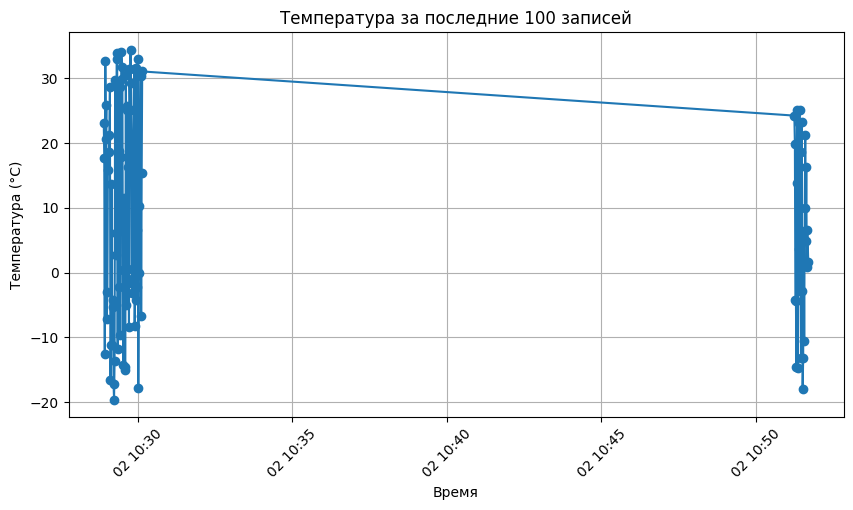

In [3]:
# График температуры
plt.figure(figsize=(10,5))
plt.plot(pd.to_datetime(df['timestamp']), df['temperature_c'], marker='o')
plt.title('Температура за последние 100 записей')
plt.xlabel('Время')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

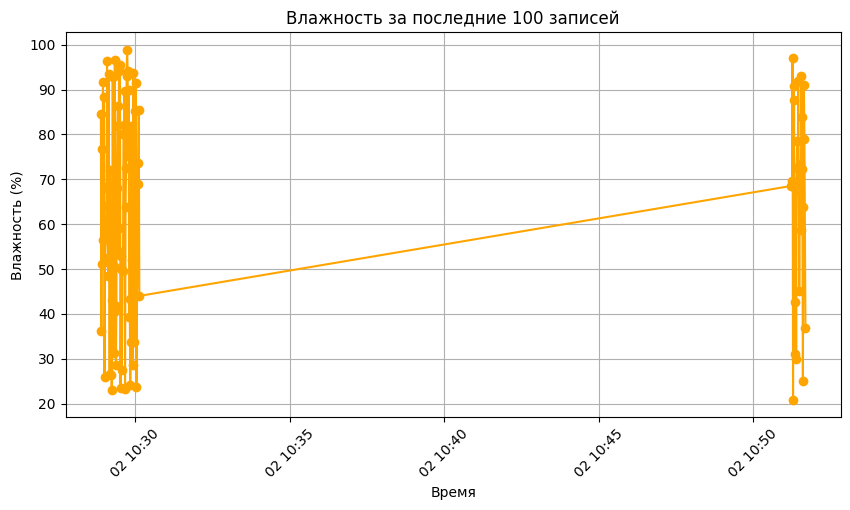

In [4]:
# График влажности
plt.figure(figsize=(10,5))
plt.plot(pd.to_datetime(df['timestamp']), df['humidity_percent'], marker='o', color='orange')
plt.title('Влажность за последние 100 записей')
plt.xlabel('Время')
plt.ylabel('Влажность (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()